# Wczytywanie danych

In [1]:
import numpy as np
import pandas as pd

tshirts = pd.read_csv('t-shirts.csv')

tshirts_df = pd.DataFrame(tshirts)

print(tshirts_df.head(10))

print()

print(tshirts_df.describe(include='all'))

  size   material   color sleeves  demand
0    S      nylon   white    long  medium
1   XL  polyester   cream   short    high
2    S       silk    blue   short  medium
3    M     cotton   black   short  medium
4   XL  polyester  orange    long  medium
5   XS  polyester   black   short  medium
6  XXL  polyester   green   short  medium
7    L      linen  yellow   short    high
8   XL      linen   cream    long    high
9   XS      nylon     red   short    high

         size material  color sleeves demand
count   20000    20000  20000   20000  20000
unique      7        5     10       2      3
top         L    nylon  white    long   high
freq     4408     5652   3286   10117   8965


# Wizualizacja danych
## Rozkłady rozmiaru, materiału, koloru, rękawów oraz zapotrzebowania


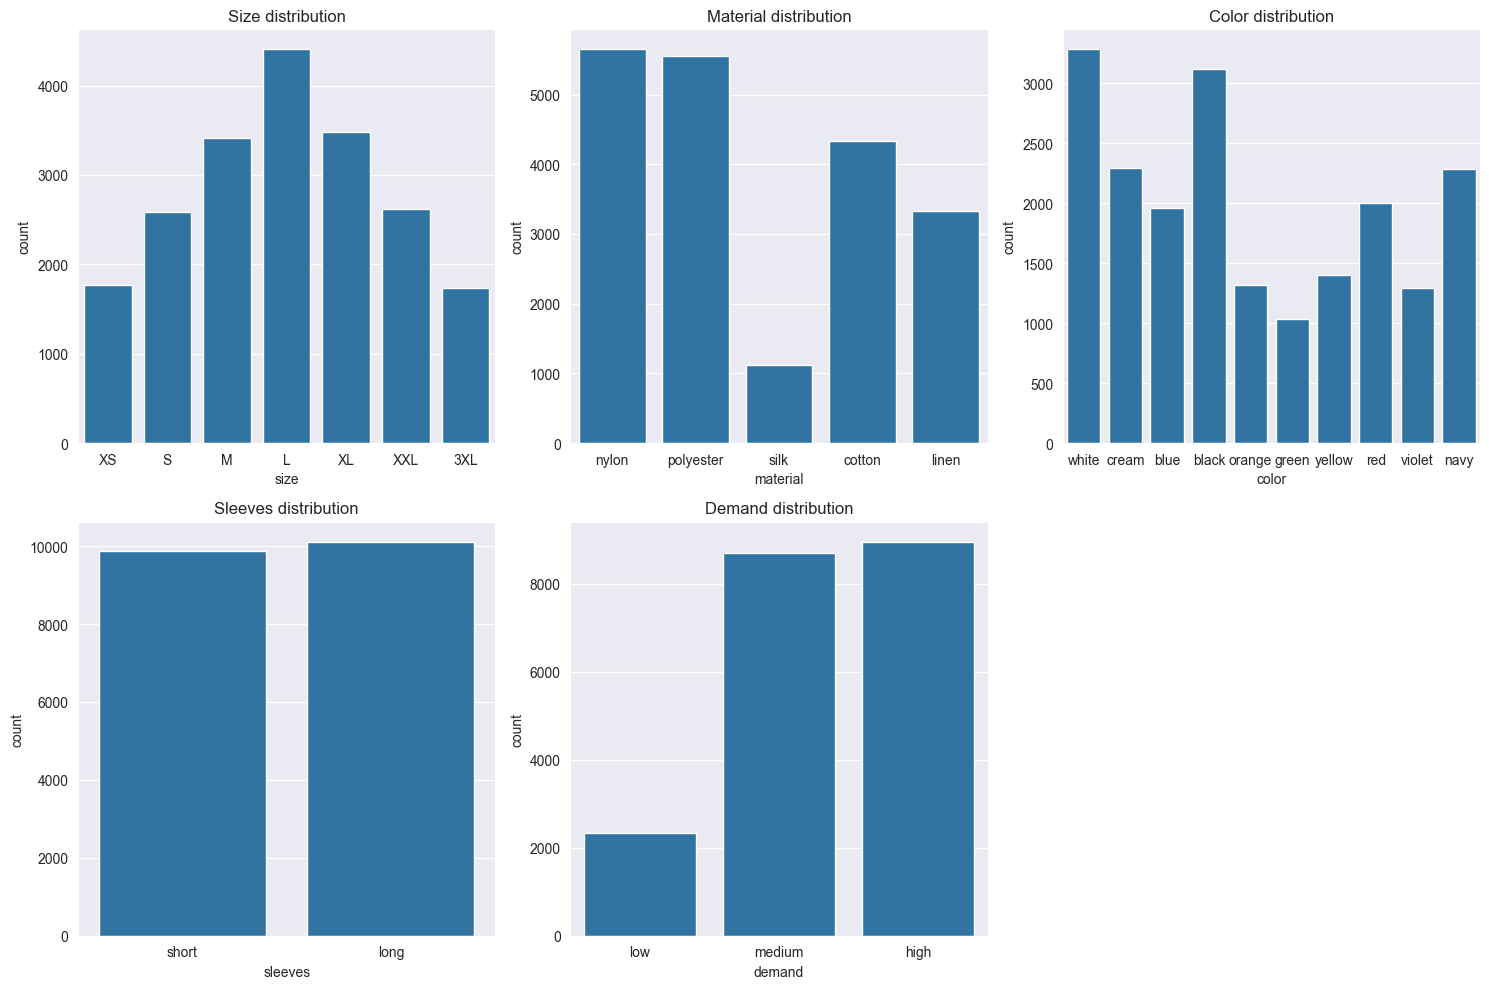

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(x='size', data=tshirts_df, order=['XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL'])
plt.title('Size distribution')

plt.subplot(2, 3, 2)
sns.countplot(x='material', data=tshirts_df, order=['nylon', 'polyester', 'silk', 'cotton', 'linen'])
plt.title('Material distribution')

plt.subplot(2, 3, 3)
sns.countplot(x='color', data=tshirts_df, order=['white', 'cream', 'blue', 'black', 'orange', 'green', 'yellow', 'red', 'violet', 'navy'])
plt.title('Color distribution')

plt.subplot(2, 3, 4)
sns.countplot(x='sleeves', data=tshirts_df, order=['short', 'long'])
plt.title('Sleeves distribution')

plt.subplot(2, 3, 5)
sns.countplot(x='demand', data=tshirts_df, order=['low', 'medium', 'high'])
plt.title('Demand distribution')

plt.tight_layout()
plt.show()

## Korelacje pomiędzy zapotrzebowaniem i innymi metrykami

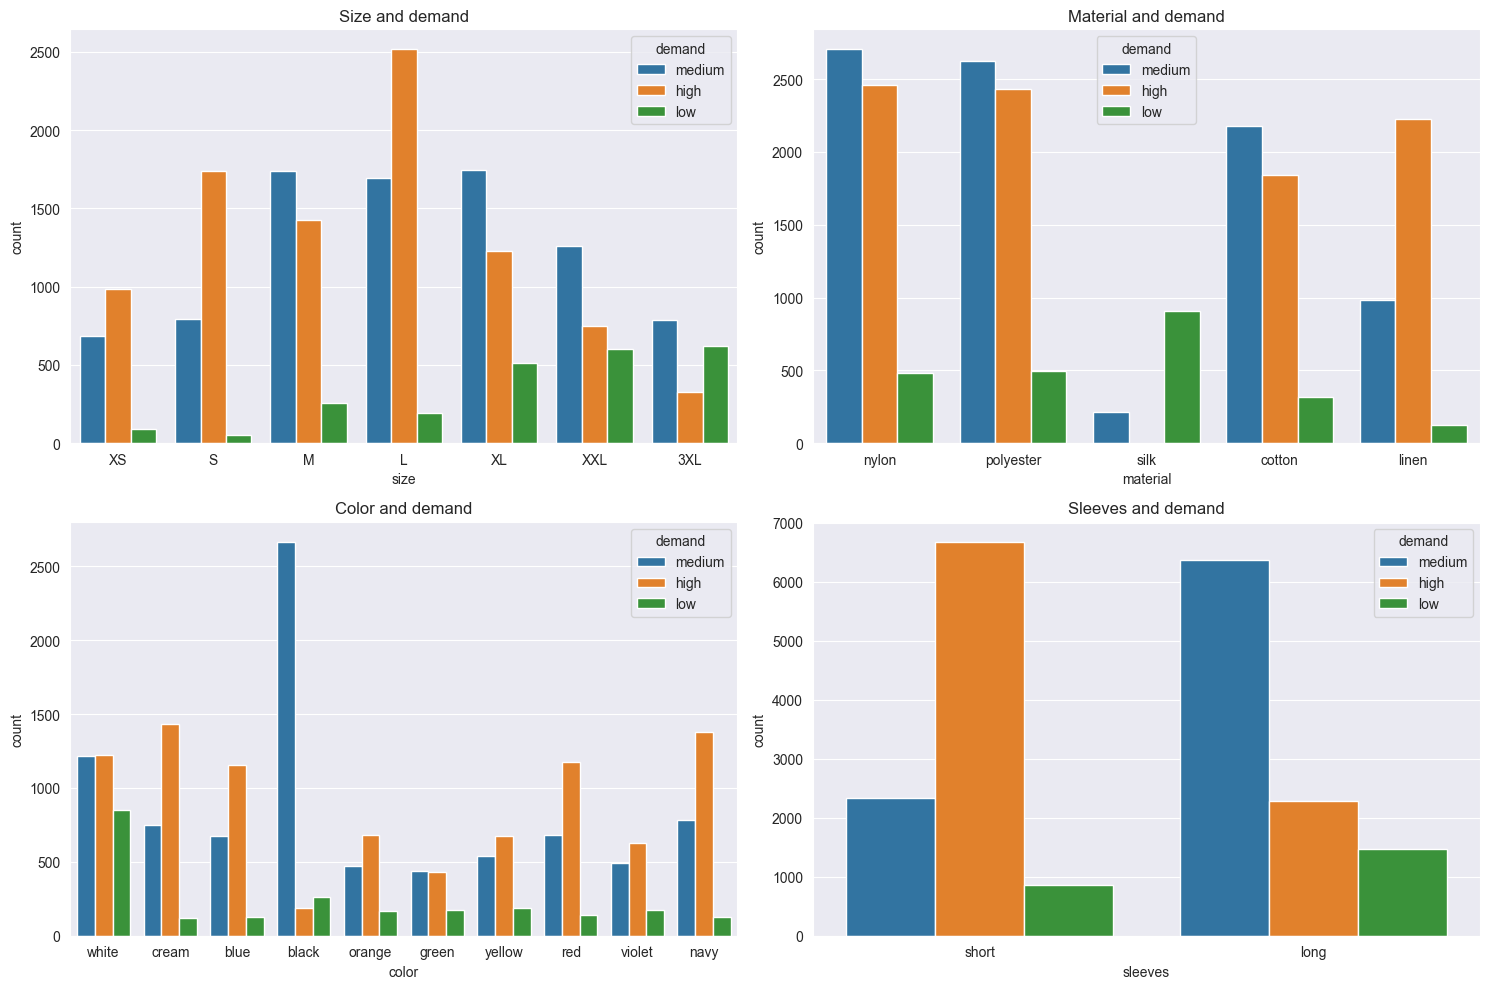

In [3]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='size', hue='demand', data=tshirts_df, order=['XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL'])
plt.title('Size and demand')

plt.subplot(2, 2, 2)
sns.countplot(x='material', hue='demand', data=tshirts_df, order=['nylon', 'polyester', 'silk', 'cotton', 'linen'])
plt.title('Material and demand')

plt.subplot(2, 2, 3)
sns.countplot(x='color', hue='demand', data=tshirts_df, order=['white', 'cream', 'blue', 'black', 'orange', 'green', 'yellow', 'red', 'violet', 'navy'])
plt.title('Color and demand')

plt.subplot(2, 2, 4)
sns.countplot(x='sleeves', hue='demand', data=tshirts_df, order=['short', 'long'])
plt.title('Sleeves and demand')

plt.tight_layout()
plt.show()

## Macierz korelacji
Według macierzy korelacji, tylko sleeves i w małym stopniu color mają wpływ na zapotrzebowanie. Pozostałe cechy nie mają wpływu na zapotrzebowanie. Wynikać to może jednak z tego, że macierz korelacji stosowana jest do zmiennych ciągłych, a nie kategorycznych.

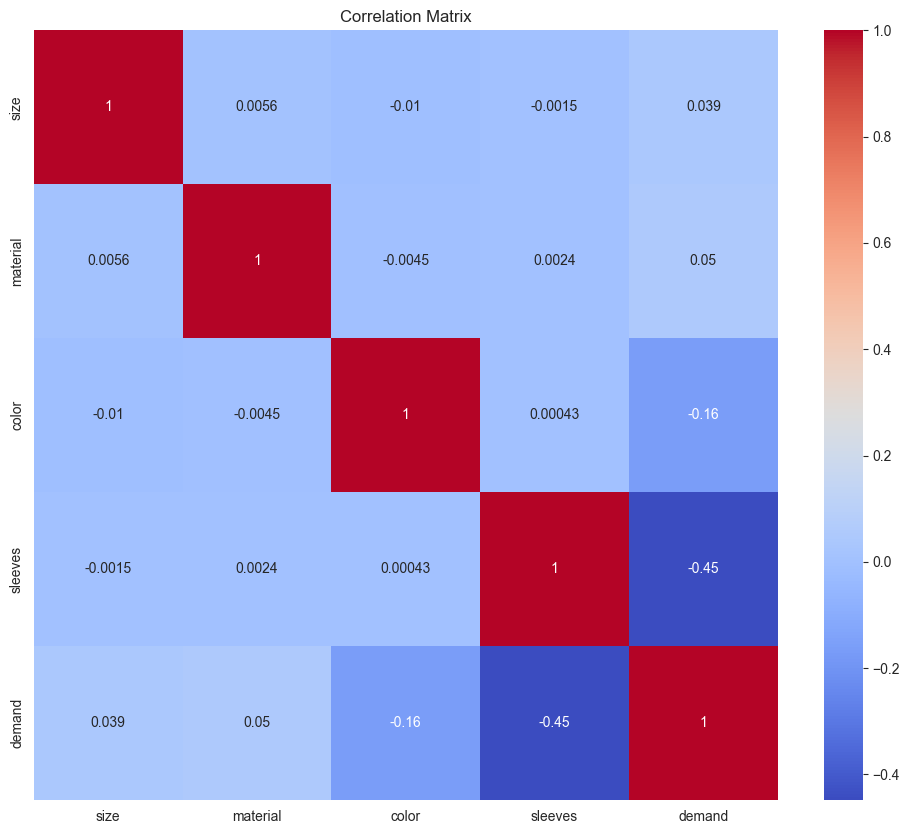

   size  material  color  sleeves  demand
0     3         2      8        0       2
1     4         3      2        1       0
2     3         4      1        1       2
3     2         0      0        1       2
4     4         3      5        0       2
5     5         3      0        1       2
6     6         3      3        1       2
7     1         1      9        1       0
8     4         1      2        0       0
9     5         2      6        1       0


In [4]:
from sklearn.preprocessing import LabelEncoder

tshirts = pd.read_csv('t-shirts.csv')
tshirts_df = pd.DataFrame(tshirts)

label_encoders = {}
for column in tshirts_df.columns:
    le = LabelEncoder()
    tshirts_df[column] = le.fit_transform(tshirts_df[column])
    label_encoders[column] = le

corr_matrix = tshirts_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

print(tshirts_df.head(10))

# Dzielenie zbioru danych na zbiór treningowy i walidacyjny

Spośród zaproponowanych metod przetwarzania danych (normalizacja, standaryzacja, dyskretyzacja, selekcja cech, PCA) metody dyskretyzacji i selekcji cech nie mają zastosowania w przypadku tego zbioru danych. W przypadku dyskretyzacji, wszystkie dane są już dyskretyzowane, a w przypadku selekcji cech, nie posiadamy wielu cech i wszystkie są istotne dla modelu. PCA również nie ma zastosowania, ponieważ nie ma sensu redukować wymiarów zbioru danych, który ma tylko 5 kolumn. Zatem pozostają dwie metody: normalizacja i standaryzacja.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = tshirts_df.drop('demand', axis=1)
y = tshirts_df['demand']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

processed_x_train = X_train.copy()
processed_x_val = X_val.copy()

scaler = StandardScaler()
processed_x_train = scaler.fit_transform(processed_x_train)
processed_x_val = scaler.transform(processed_x_val)

processed2_x_train = X_train.copy()
processed2_x_val = X_val.copy()

scaler = MinMaxScaler()
processed2_x_train = scaler.fit_transform(processed2_x_train)
processed2_x_val = scaler.transform(processed2_x_val)


Zbiór danych z zastosowanym StandardScalerem:

In [6]:
print(processed_x_train[:10])

[[ 1.66463121 -0.64894067  1.54444881 -0.98328257]
 [-1.52271827  0.99009404  0.56060409 -0.98328257]
 [-0.99149336 -0.64894067  0.56060409  1.01700165]
 [-0.46026844  0.17057668 -0.75118887  1.01700165]
 [-0.99149336 -1.46845802 -0.09529239  1.01700165]
 [ 0.07095647 -0.64894067  0.56060409 -0.98328257]
 [ 1.1334063   0.99009404  1.21650057 -0.98328257]
 [ 1.66463121  1.80961139 -0.75118887 -0.98328257]
 [-0.46026844  0.99009404 -1.40708535 -0.98328257]
 [-0.46026844  0.17057668 -1.40708535 -0.98328257]]


Zbiór danych z zastosowanym MinMaxScalerem:

In [7]:
print(processed2_x_train[:10])

[[1.         0.25       1.         0.        ]
 [0.         0.75       0.66666667 0.        ]
 [0.16666667 0.25       0.66666667 1.        ]
 [0.33333333 0.5        0.22222222 1.        ]
 [0.16666667 0.         0.44444444 1.        ]
 [0.5        0.25       0.66666667 0.        ]
 [0.83333333 0.75       0.88888889 0.        ]
 [1.         1.         0.22222222 0.        ]
 [0.33333333 0.75       0.         0.        ]
 [0.33333333 0.5        0.         0.        ]]


# Brakujące dane

W celu symulacji brakujących danych, wygenerowałem maskę, która losowo wybiera 6% wartości do usunięcia. Następnie zastąpiłem te wartości NaN.

In [8]:
tshirts_missing_df = tshirts_df.copy()

np.random.seed(42)
missing_mask = np.random.rand(*tshirts_missing_df.shape) < 0.06
tshirts_missing_df[missing_mask] = np.nan

print(tshirts_missing_df.head(10))

   size  material  color  sleeves  demand
0   3.0       2.0    8.0      0.0     2.0
1   4.0       NaN    2.0      1.0     0.0
2   NaN       4.0    1.0      1.0     2.0
3   2.0       0.0    0.0      1.0     2.0
4   4.0       3.0    5.0      0.0     2.0
5   5.0       3.0    0.0      1.0     NaN
6   6.0       3.0    3.0      1.0     2.0
7   1.0       1.0    9.0      1.0     0.0
8   4.0       1.0    NaN      0.0     0.0
9   5.0       2.0    6.0      1.0     0.0


Aby zastąpić brakujące dane, użyłem dwóch metod: zastąpienie wartością średnią oraz zastąpienie wartością mediany. W obu przypadkach użyłem SimpleImputer z biblioteki sklearn.

Jako lepsze rozwiązanie wybrałem zastąpienie wartością mediany, ponieważ dane opierają się o LabelEncoding, a wartość średnia nie ma sensu w przypadku danych kategorycznych (wartość nie zgadza się z żadnym z możliwych kategorii). Mediana natomiast zawsze jest jedną z możliwych wartości.

In [9]:
from sklearn.impute import SimpleImputer

imputer_mean = SimpleImputer(strategy='mean')
tshirts_df_mean_imputed = imputer_mean.fit_transform(tshirts_missing_df)

print(pd.DataFrame(tshirts_df_mean_imputed, columns=tshirts_df.columns).head(10))

       size  material     color  sleeves    demand
0  3.000000  2.000000  8.000000      0.0  2.000000
1  4.000000  1.790229  2.000000      1.0  0.000000
2  2.870372  4.000000  1.000000      1.0  2.000000
3  2.000000  0.000000  0.000000      1.0  2.000000
4  4.000000  3.000000  5.000000      0.0  2.000000
5  5.000000  3.000000  0.000000      1.0  0.987677
6  6.000000  3.000000  3.000000      1.0  2.000000
7  1.000000  1.000000  9.000000      1.0  0.000000
8  4.000000  1.000000  4.271886      0.0  0.000000
9  5.000000  2.000000  6.000000      1.0  0.000000


In [10]:
imputer_median = SimpleImputer(strategy='median')
tshirts_df_median_imputed = imputer_median.fit_transform(tshirts_missing_df)

print(pd.DataFrame(tshirts_df_median_imputed, columns=tshirts_df.columns).head(10))

   size  material  color  sleeves  demand
0   3.0       2.0    8.0      0.0     2.0
1   4.0       2.0    2.0      1.0     0.0
2   3.0       4.0    1.0      1.0     2.0
3   2.0       0.0    0.0      1.0     2.0
4   4.0       3.0    5.0      0.0     2.0
5   5.0       3.0    0.0      1.0     1.0
6   6.0       3.0    3.0      1.0     2.0
7   1.0       1.0    9.0      1.0     0.0
8   4.0       1.0    4.0      0.0     0.0
9   5.0       2.0    6.0      1.0     0.0


# Klasyfikacja

Klasyfikacja polega na przypisaniu danych wejściowych do jednej z kilku wcześniej zdefiniowanych kategorii. Celem klasyfikacji jest nauczenie modelu rozpoznawania i przewidywania, do której klasy należy nowa, niewidziana wcześniej próbka danych.

Do klasyfikacji tego zbioru wybrałem następujące modele: Naive Bayes, Decision Tree oraz Random Forest z biblioteki sklearn. Do oceny modeli użyłem metryk accuracy, precision, recall oraz f1-score. 

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

## Naive Bayes

Naive Bayes to rodzina prostych algorytmów klasyfikacyjnych opartych na twierdzeniu Bayesa z założeniem niezależności między cechami. Nazwa "naiwny" pochodzi od tego założenia o niezależności, które w praktyce jest często nieprawdziwe, ale mimo to algorytm działa bardzo dobrze w wielu rzeczywistych zastosowaniach.
Twierdzenie Bayesa opisuje zależność prawdopodobieństwa warunkowego między dwoma zdarzeniami.

Gaussian Naive Bayes zakłada, że cechy mają rozkład normalny (Gaussa). Jest często używany dla danych ciągłych.
Parametr var_smoothing jest używany do obliczenia wariancji cech. Jest to wartość dodana do wariancji cech, aby zapobiec zerowej wariancji.

Multinomial Naive Bayes jest używany głównie dla danych dyskretnych.

Bernoulli Naive Bayes zakłada, że cechy są binarne (0 lub 1). Jest używany w przypadku binarnych danych wejściowych.

Dla Multinomial i Bernoulli parametrem jest alpha, który jest używany do regularyzacji. Im większa wartość alpha, tym mniejsze znaczenie mają rzadkie cechy.

Sprawdziłem wszystkie 3 wersje Naive Bayes. O dziwo najlepsze wyniki uzyskałem dla Bernoulli Naive Bayes, co jest zaskakujące, ponieważ dane wejściowe nie są binarne. Może to wynikać z faktu, że Bernoulli Naive Bayes jest bardziej odporny na szumy w danych niż pozostałe wersje. 

In [12]:
nb_model = GaussianNB()

nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
}

nb_grid = GridSearchCV(estimator=nb_model, param_grid=nb_params, cv=5, scoring='accuracy')
nb_grid.fit(X_train, y_train)

print("Best parameters for Gaussian Naive Bayes:", nb_grid.best_params_)
nb_best_model = nb_grid.best_estimator_
nb_predictions = nb_best_model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, nb_predictions))
print(classification_report(y_val, nb_predictions))

Best parameters for Gaussian Naive Bayes: {'var_smoothing': 0.01}
Accuracy: 0.679
              precision    recall  f1-score   support

           0       0.72      0.75      0.73      2730
           1       0.84      0.08      0.14       668
           2       0.64      0.76      0.69      2602

    accuracy                           0.68      6000
   macro avg       0.73      0.53      0.52      6000
weighted avg       0.70      0.68      0.65      6000



In [13]:
nb_model = MultinomialNB()

nb_params = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]
}

nb_grid = GridSearchCV(estimator=nb_model, param_grid=nb_params, cv=5, scoring='accuracy')
nb_grid.fit(X_train, y_train)

print("Best parameters for Multinomial Naive Bayes:", nb_grid.best_params_)
nb_best_model = nb_grid.best_estimator_
nb_predictions = nb_best_model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, nb_predictions))
print(classification_report(y_val, nb_predictions))

Best parameters for Multinomial Naive Bayes: {'alpha': 0.001}
Accuracy: 0.6201666666666666
              precision    recall  f1-score   support

           0       0.63      0.73      0.67      2730
           1       1.00      0.01      0.01       668
           2       0.61      0.67      0.64      2602

    accuracy                           0.62      6000
   macro avg       0.75      0.47      0.44      6000
weighted avg       0.66      0.62      0.58      6000



In [14]:
nb_model = BernoulliNB()

nb_params = {
    'alpha': [0.1, 0.5, 1, 1.5, 2, 3, 5]
}

nb_grid = GridSearchCV(estimator=nb_model, param_grid=nb_params, cv=5, scoring='accuracy')
nb_grid.fit(X_train, y_train)

print("Best parameters for Bernoulli Naive Bayes:", nb_grid.best_params_)
nb_best_model = nb_grid.best_estimator_
nb_predictions = nb_best_model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, nb_predictions))
print(classification_report(y_val, nb_predictions))

Best parameters for Bernoulli Naive Bayes: {'alpha': 2}
Accuracy: 0.7231666666666666
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      2730
           1       0.52      0.14      0.22       668
           2       0.67      0.85      0.75      2602

    accuracy                           0.72      6000
   macro avg       0.66      0.58      0.58      6000
weighted avg       0.71      0.72      0.70      6000



### Wartości parametrów dla Bernoulli Naive Bayes

Najlepsze wyniki uzyskałem dla parametru alpha=2. Należy jednak zauważyć, że wyniki dla różnych wartości alpha były bardzo zbliżone, co sugeruje, że model jest odporny na zmiany tego parametru. Dodatkowo wartości alpha=2, 3, 5. Jakakolwiek z tych wartości mogłaby być uznana za najlepszą. Bazową wielkością jest 1.

In [15]:
import warnings

results = pd.DataFrame(nb_grid.cv_results_)

warnings.filterwarnings('ignore')

for i, params in enumerate(results['params']):
    print(f"Results for parameters: {params}")
    mean_test_score = results.loc[i, 'mean_test_score']
    std_test_score = results.loc[i, 'std_test_score']
    print(f"Mean Test Accuracy: {mean_test_score:.4f}")
    print(f"Standard Deviation of Test Accuracy: {std_test_score:.4f}")

    model = BernoulliNB(**params)
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)

    accuracy = accuracy_score(y_val, predictions)
    report = classification_report(y_val, predictions, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    print(f"Validation Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\n")


Results for parameters: {'alpha': 0.1}
Mean Test Accuracy: 0.7061
Standard Deviation of Test Accuracy: 0.0058
Validation Accuracy: 0.7232
Precision: 0.7146
Recall: 0.7232
F1-Score: 0.7021


Results for parameters: {'alpha': 0.5}
Mean Test Accuracy: 0.7061
Standard Deviation of Test Accuracy: 0.0058
Validation Accuracy: 0.7232
Precision: 0.7146
Recall: 0.7232
F1-Score: 0.7021


Results for parameters: {'alpha': 1}
Mean Test Accuracy: 0.7061
Standard Deviation of Test Accuracy: 0.0058
Validation Accuracy: 0.7232
Precision: 0.7146
Recall: 0.7232
F1-Score: 0.7021


Results for parameters: {'alpha': 1.5}
Mean Test Accuracy: 0.7061
Standard Deviation of Test Accuracy: 0.0058
Validation Accuracy: 0.7232
Precision: 0.7146
Recall: 0.7232
F1-Score: 0.7021


Results for parameters: {'alpha': 2}
Mean Test Accuracy: 0.7086
Standard Deviation of Test Accuracy: 0.0025
Validation Accuracy: 0.7232
Precision: 0.7146
Recall: 0.7232
F1-Score: 0.7021


Results for parameters: {'alpha': 3}
Mean Test Accurac

## Decision Tree

Decision Tree używany jest zarówno do klasyfikacji, jak i regresji. Modeluje proces podejmowania decyzji w formie drzewa, gdzie każdy węzeł wewnętrzny reprezentuje test na wartości cechy, każda gałąź reprezentuje wynik tego testu, a każdy liść reprezentuje decyzję lub wartość przewidywaną (w przypadku regresji).

Algorytm rozpoczyna od całego zbioru danych i dzieli go na mniejsze podzbiory. Podział jest wykonywany rekurencyjnie na każdym z nowo powstałych podzbiorów, tworząc w ten sposób strukturę drzewa.

Każdy węzeł wewnętrzny wykonuje test na jednej z cech danych. Na podstawie wyniku tego testu, dane są kierowane do jednego z potomków węzła. Proces ten powtarza się aż do osiągnięcia węzła liścia, który zawiera decyzję lub wartość przewidywaną.

Parametr max_depth określa maksymalną głębokość drzewa. Im większa wartość, tym bardziej złożone drzewo. Zbyt wielka głębokość może doprowadzić do przeuczenia. 
Parametr min_samples_split określa minimalną liczbę próbek wymaganą do podziału węzła. 
Parametr min_samples_leaf określa minimalną liczbę próbek wymaganą w liściu.


In [16]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_params = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 7, 10]
}

dt_grid = GridSearchCV(estimator=dt_model, param_grid=dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

print("Best parameters for Decision Tree:", dt_grid.best_params_)
dt_best_model = dt_grid.best_estimator_
dt_predictions = dt_best_model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, dt_predictions))
print(classification_report(y_val, dt_predictions))

Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.972
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2730
           1       0.94      0.94      0.94       668
           2       0.97      0.97      0.97      2602

    accuracy                           0.97      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.97      0.97      0.97      6000



### Wartości parametrów dla Decision Tree

Najlepsze wyniki uzyskałem dla parametrów: max_depth=None, min_samples_leaf=1, min_samples_split=2. Większe wartości min_sample_split zmniejszały wyniki, co jest zrozumiałe, ponieważ wymagały większej liczby próbek do podziału węzła. Dla min_samples_leafwyniki również zmniejszały się powyżej wartości 2, dla 1 i 2 wyniki były takie same. Dla większych wartości max_depth wyniki zmniejszyły się znacząco.

In [17]:
dt_results = pd.DataFrame(dt_grid.cv_results_)

for i, params in enumerate(dt_results['params']):
    print(f"Results for parameters: {params}")
    mean_test_score = dt_results.loc[i, 'mean_test_score']
    std_test_score = dt_results.loc[i, 'std_test_score']
    print(f"Mean Test Accuracy: {mean_test_score:.4f}")
    print(f"Standard Deviation of Test Accuracy: {std_test_score:.4f}")

    model = DecisionTreeClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)

    accuracy = accuracy_score(y_val, predictions)
    report = classification_report(y_val, predictions, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    print(f"Validation Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\n")


Results for parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Test Accuracy: 0.9699
Standard Deviation of Test Accuracy: 0.0012
Validation Accuracy: 0.9720
Precision: 0.9720
Recall: 0.9720
F1-Score: 0.9720


Results for parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Mean Test Accuracy: 0.9699
Standard Deviation of Test Accuracy: 0.0012
Validation Accuracy: 0.9720
Precision: 0.9720
Recall: 0.9720
F1-Score: 0.9720


Results for parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean Test Accuracy: 0.9697
Standard Deviation of Test Accuracy: 0.0016
Validation Accuracy: 0.9713
Precision: 0.9714
Recall: 0.9713
F1-Score: 0.9713


Results for parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 15}
Mean Test Accuracy: 0.9680
Standard Deviation of Test Accuracy: 0.0025
Validation Accuracy: 0.9713
Precision: 0.9714
Recall: 0.9713
F1-Score: 0.9713


Results for parameters: {'max_

## Random Forest

Random Forest to algorytm ensemble, który łączy wiele drzew decyzyjnych w celu poprawy dokładności klasyfikacji lub regresji oraz zwiększenia odporności na przeuczenie (overfitting). Algorytm tworzy wiele drzew decyzyjnych, a następnie agreguje ich wyniki, aby uzyskać bardziej stabilne i dokładne przewidywania.

Random Forest tworzy wiele drzew decyzyjnych podczas treningu. Każde drzewo jest trenowane na losowym podzbiorze danych treningowych.

Dla każdego podziału węzła w drzewie, zamiast rozważać wszystkie dostępne cechy, Random Forest losowo wybiera podzbiór cech.

W przypadku klasyfikacji, Random Forest dokonuje przewidywania na podstawie głosowania większościowego wyników poszczególnych drzew.

Parametr n_estimators określa liczbę drzew w lesie.
Parametr max_depth określa maksymalną głębokość drzewa.
Parametr min_samples_split określa minimalną liczbę próbek wymaganą do podziału węzła.
Parametr min_samples_leaf określa minimalną liczbę próbek wymaganą w liściu.

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

print("Best parameters for Random Forest:", rf_grid.best_params_)
rf_best_model = rf_grid.best_estimator_
rf_predictions = rf_best_model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, rf_predictions))
print(classification_report(y_val, rf_predictions))


Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.9698333333333333
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2730
           1       0.94      0.93      0.93       668
           2       0.96      0.98      0.97      2602

    accuracy                           0.97      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.97      0.97      0.97      6000



### Wartości parametrów dla Random Forest

Najlepsze wyniki uzyskałem dla parametrów: max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50. Wartość n_estimators nie miała wpływu na wyniki, co jest zaskakujące, ponieważ większa liczba drzew powinna zapewnić lepsze wyniki. Może to jednak wynikać ze zbyt małej liczby możliwych drzew. Wartość mins_samples_split wraz ze wzrostem nieznacznie zwiększała wyniki. Wartość min_samples_leaf wraz ze wzrostem znacznie pogarszała wyniki. Wartość max_depth miała największy wpływ na wyniki, dla wartości None wyniki były najlepsze. 

Co ciekawe pomiędzy wynikami powyżej i poniżej istnieje rozbierzność, choć zgadzają się co do najlepszych parametrów.

In [19]:
rf_results = pd.DataFrame(rf_grid.cv_results_)

for i, params in enumerate(rf_results['params']):
    print(f"Results for parameters: {params}")
    mean_test_score = rf_results.loc[i, 'mean_test_score']
    std_test_score = rf_results.loc[i, 'std_test_score']
    print(f"Mean Test Accuracy: {mean_test_score:.4f}")
    print(f"Standard Deviation of Test Accuracy: {std_test_score:.4f}")

    model = RandomForestClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)

    accuracy = accuracy_score(y_val, predictions)
    report = classification_report(y_val, predictions, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    print(f"Validation Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\n")


Results for parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mean Test Accuracy: 0.9703
Standard Deviation of Test Accuracy: 0.0015
Validation Accuracy: 0.9702
Precision: 0.9704
Recall: 0.9702
F1-Score: 0.9702


Results for parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Test Accuracy: 0.9703
Standard Deviation of Test Accuracy: 0.0015
Validation Accuracy: 0.9702
Precision: 0.9704
Recall: 0.9702
F1-Score: 0.9702


Results for parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Mean Test Accuracy: 0.9704
Standard Deviation of Test Accuracy: 0.0015
Validation Accuracy: 0.9705
Precision: 0.9707
Recall: 0.9705
F1-Score: 0.9705


Results for parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mean Test Accuracy: 0.9704
Standard Deviation of Test Accuracy: 0.0015
Validation Accuracy: 0.9703
Pr

# Metryki

### Accuracy
Procent poprawnych przewidywań w stosunku do całkowitej liczby przykładów.
Wzór: (TP + TN) / (TP + TN + FP + FN)

### Precision
Procent poprawnych przewidywań pozytywnych spośród wszystkich przewidywań pozytywnych.
Wzór: TP / (TP + FP)

### Recall
Procent poprawnych przewidywań pozytywnych spośród wszystkich rzeczywistych pozytywnych przykładów.
Wzór: TP / (TP + FN)

### F1-Score
Harmoniczna średnia precyzji i czułości, która zapewnia równowagę między tymi dwiema metrykami.
Wzór: 2 * (Precision * Recall) / (Precision + Recall)

### Confusion Matrix
Tabela przedstawiająca wyniki klasyfikacji, gdzie wiersze reprezentują rzeczywiste klasy, a kolumny reprezentują przewidywane klasy.

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

def train_and_evaluate(model, X_val, y_val):
    predictions = model.predict(X_val)
    
    cm = confusion_matrix(y_val, predictions)
    
    accuracy = accuracy_score(y_val, predictions)
    precision = precision_score(y_val, predictions, average='weighted')
    recall = recall_score(y_val, predictions, average='weighted')
    f1 = f1_score(y_val, predictions, average='weighted')
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    # print("\nClassification Report:\n", classification_report(y_val, predictions))
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    return model, accuracy, precision, recall, f1

## Naive Bayes bez skalowania

Korzystając z wcześniejszych etapów wybrałem model Bernoulli Naive Bayes, ponieważ uzyskał najlepsze wyniki wraz z parametrem alpha=2, który również okazał się najlepszy.

Accuracy: 0.7231666666666666
Precision: 0.7145528745821681
Recall: 0.7231666666666666
F1-Score: 0.7020711283010701


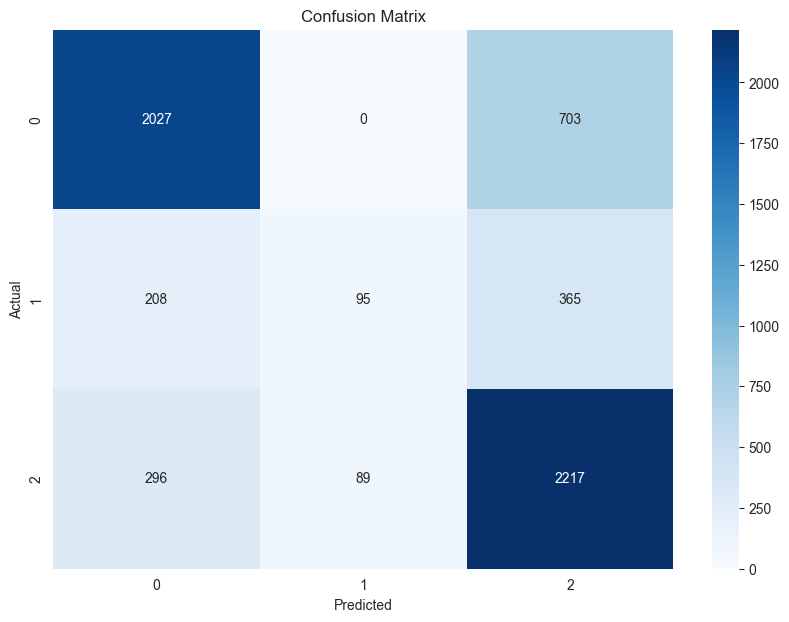

In [21]:
nb_model = BernoulliNB(alpha=2)
nb_model.fit(X_train, y_train)

_, nb_accuracy, nb_precision, nb_recall, nb_f1 = train_and_evaluate(nb_model, X_val, y_val)

## Naive Bayes z Standard Scaler

Dla Naive Bayes z Standard Scalerem wyniki były gorsze niż bez skalowania.

Accuracy: 0.6611666666666667
Precision: 0.5880745630823588
Recall: 0.6611666666666667
F1-Score: 0.6223956162617013


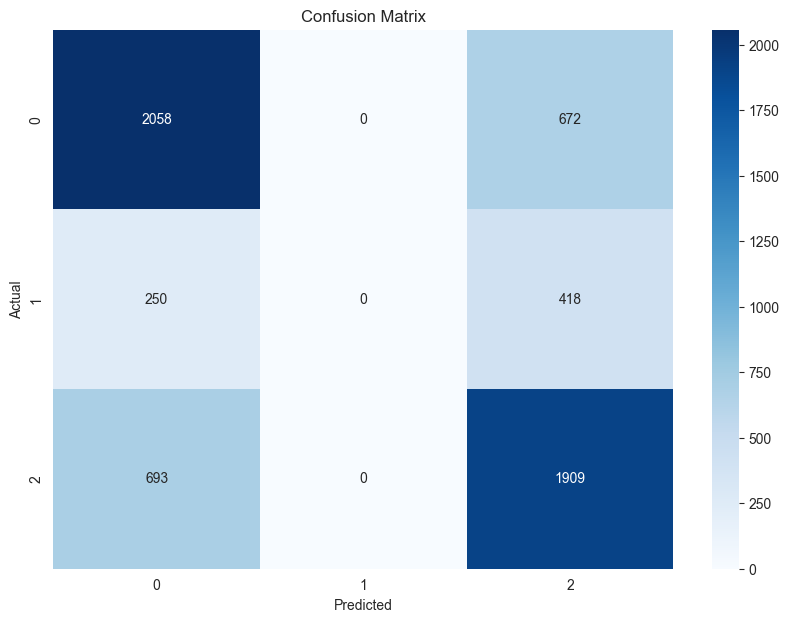

In [22]:
nb_model = BernoulliNB(alpha=2)
nb_model.fit(processed_x_train, y_train)

_, nb_accuracy, nb_precision, nb_recall, nb_f1 = train_and_evaluate(nb_model, processed_x_val, y_val)

## Naive Bayes z MinMax Scaler

Dla Naive Bayes z MinMax Scalerem wyniki były takie same jak dla danych bez skalowania, co jest zaskakujące patrząc na wyniki dla Standard Scaler.

Accuracy: 0.7231666666666666
Precision: 0.7145528745821681
Recall: 0.7231666666666666
F1-Score: 0.7020711283010701


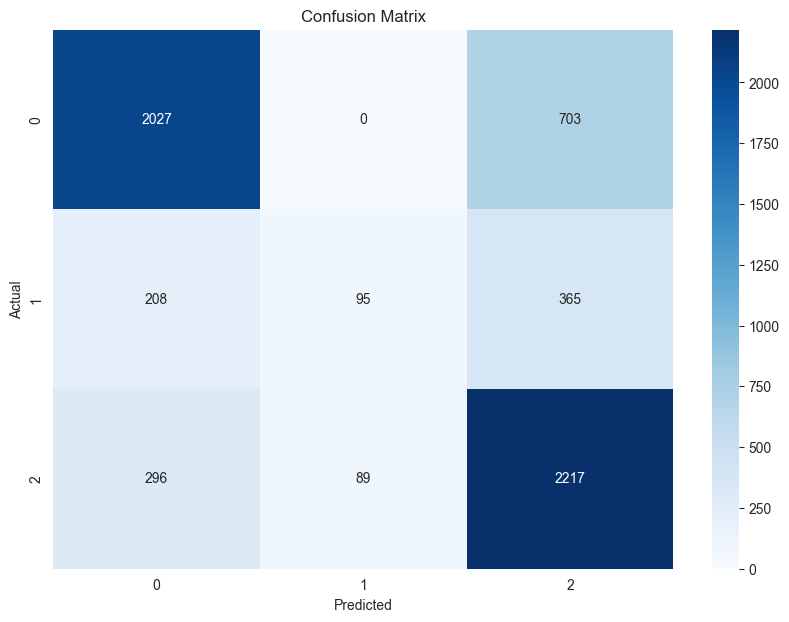

In [23]:
nb_model = BernoulliNB(alpha=2)
nb_model.fit(processed2_x_train, y_train)

_, nb_accuracy, nb_precision, nb_recall, nb_f1 = train_and_evaluate(nb_model, processed2_x_val, y_val)

## Decision Tree bez skalowania

Decision Tree oferuje znacznie lepsze wyniki niż Naive Bayes. Wyniki dla danych bez skalowania, Standard Scaler oraz MinMax Scaler były takie same.

Accuracy: 0.972
Precision: 0.9720191175070854
Recall: 0.972
F1-Score: 0.9720040866068879


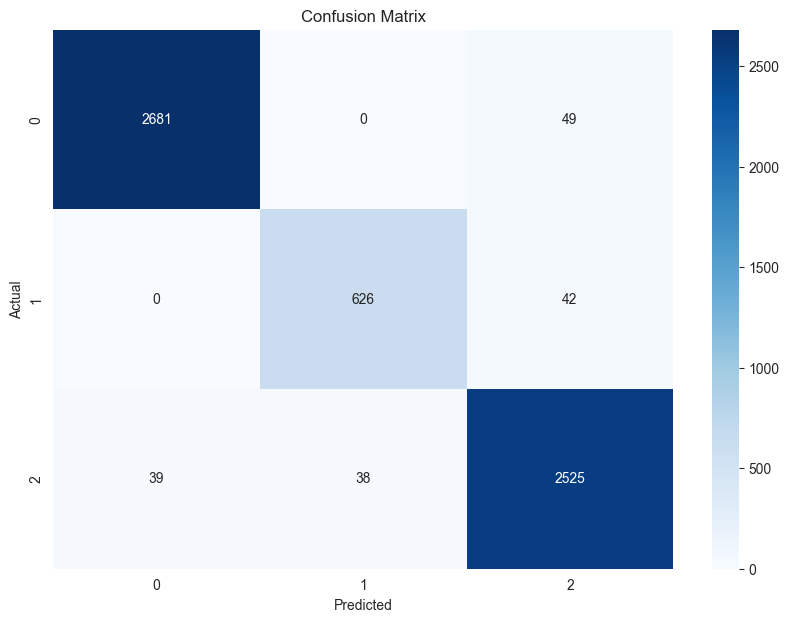

In [24]:
dt_model = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)
dt_model.fit(X_train, y_train)

_, dt_accuracy, dt_precision, dt_recall, dt_f1 = train_and_evaluate(dt_model, X_val, y_val)

## Decision Tree z Standard Scaler

Accuracy: 0.972
Precision: 0.9720191175070854
Recall: 0.972
F1-Score: 0.9720040866068879


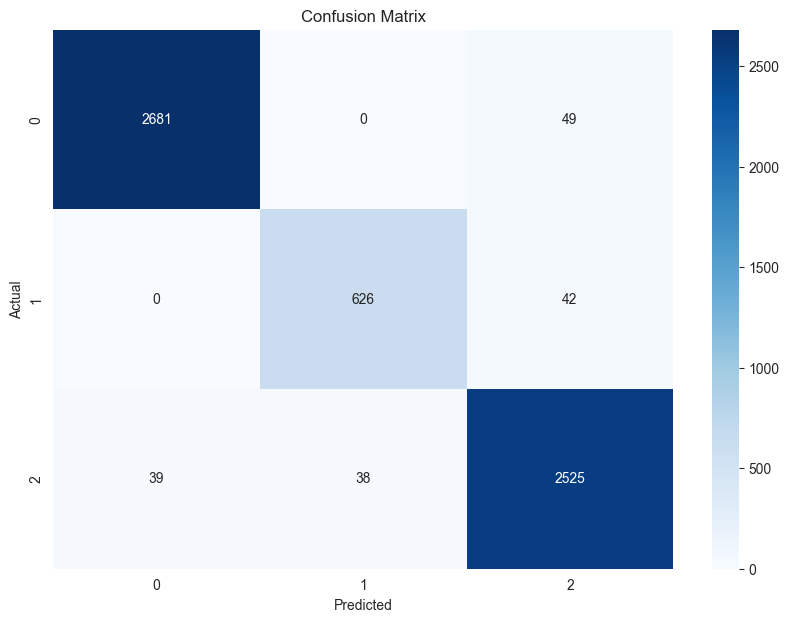

In [25]:
dt_model = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)
dt_model.fit(processed_x_train, y_train)

_, dt_accuracy, dt_precision, dt_recall, dt_f1 = train_and_evaluate(dt_model, processed_x_val, y_val)

## Decision Tree z MinMax Scaler

Accuracy: 0.972
Precision: 0.9720191175070854
Recall: 0.972
F1-Score: 0.9720040866068879


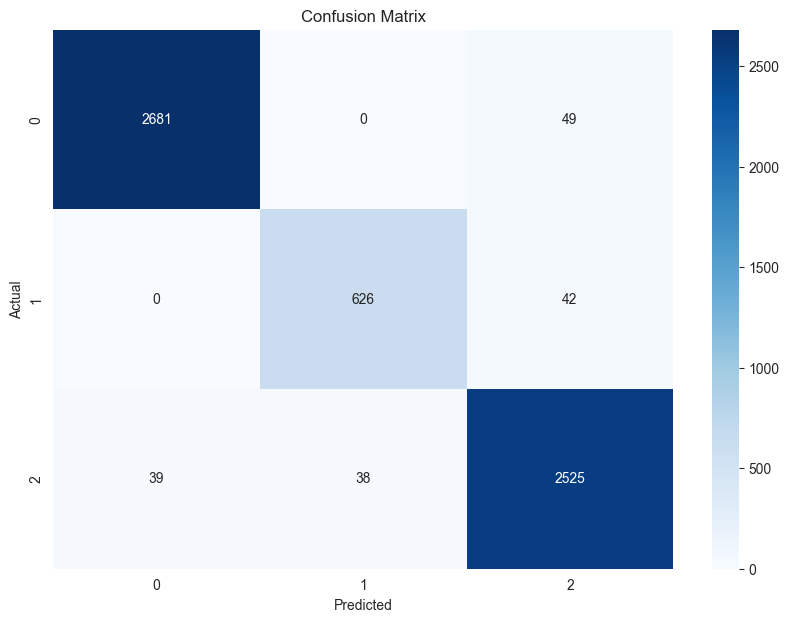

In [26]:
dt_model = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)
dt_model.fit(processed2_x_train, y_train)

_, dt_accuracy, dt_precision, dt_recall, dt_f1 = train_and_evaluate(dt_model, processed2_x_val, y_val)

## Random Forest bez skalowania

Random Forest oferuje wyniki prównywalne, lecz nieco gorsze niż Decision Tree. Jest to zaskakujące, ponieważ Random Forest jest zbiorem drzew decyzyjnych, co powinno zapewnić lepsze wyniki niż pojedyncze drzewo decyzyjne. Wyniki dla danych bez skalowania, Standard Scaler oraz MinMax Scaler były takie same.

Accuracy: 0.9698333333333333
Precision: 0.9700655728549482
Recall: 0.9698333333333333
F1-Score: 0.9698725907542683


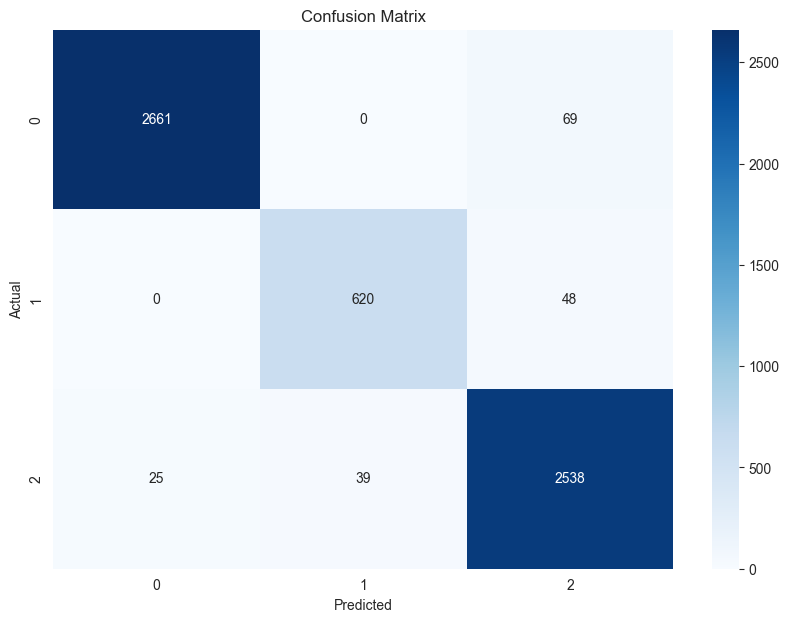

In [27]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_leaf=1, min_samples_split=10, random_state=42)

rf_model.fit(X_train, y_train)

_, rf_accuracy, rf_precision, rf_recall, rf_f1 = train_and_evaluate(rf_model, X_val, y_val)

## Random Forest z Standard Scaler

Accuracy: 0.9698333333333333
Precision: 0.9700655728549482
Recall: 0.9698333333333333
F1-Score: 0.9698725907542683


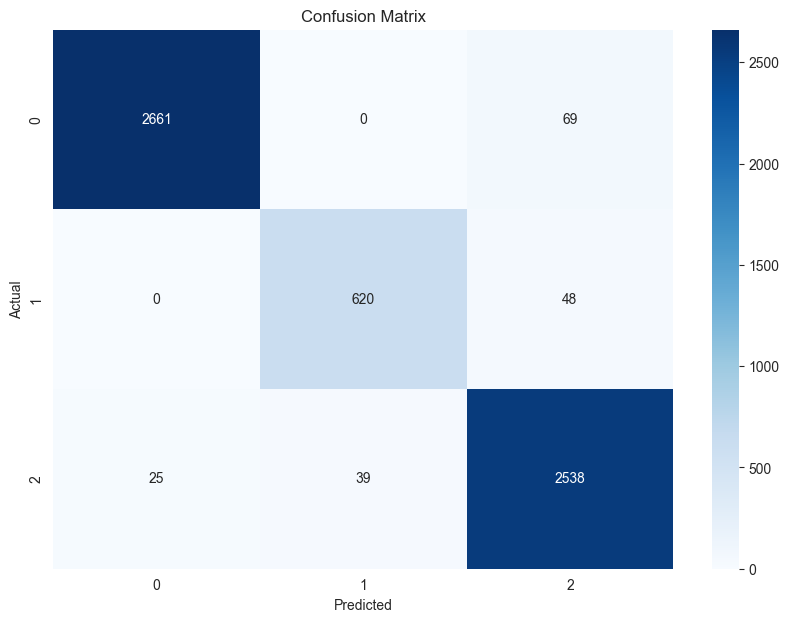

In [28]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_leaf=1, min_samples_split=10, random_state=42)

rf_model.fit(processed_x_train, y_train)

_, rf_accuracy, rf_precision, rf_recall, rf_f1 = train_and_evaluate(rf_model, processed_x_val, y_val)

## Random Forest z MinMax Scaler

Accuracy: 0.9698333333333333
Precision: 0.9700655728549482
Recall: 0.9698333333333333
F1-Score: 0.9698725907542683


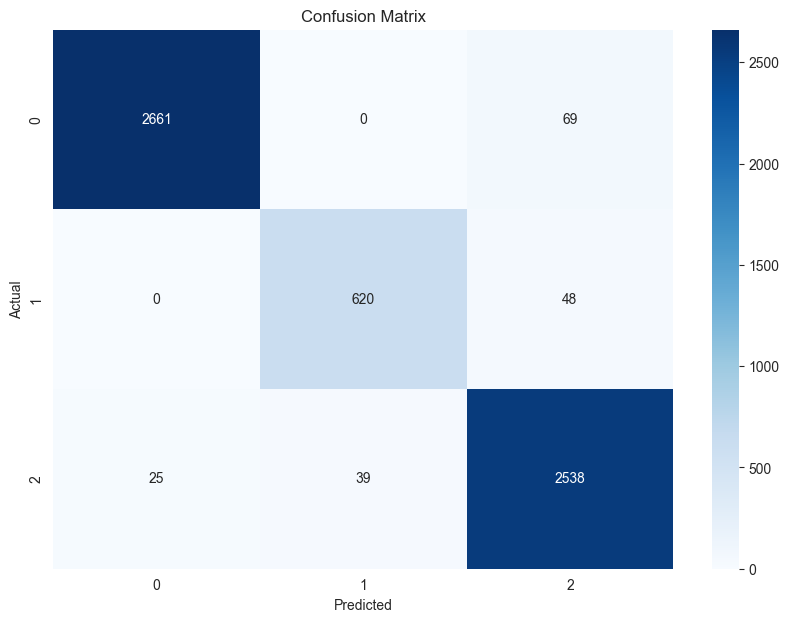

In [29]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_leaf=1, min_samples_split=10, random_state=42)

rf_model.fit(processed2_x_train, y_train)

_, rf_accuracy, rf_precision, rf_recall, rf_f1 = train_and_evaluate(rf_model, processed2_x_val, y_val)

# Podsumowanie

W przypadku klasyfikatora Naive Bayes, najlepsze wyniki uzyskano dla danych bez skalowania. Może to wynikać z faktu, że klasyfikator ten zakłada niezależność cech, a skalowanie danych może wprowadzić pewne zależności między nimi. 

W przypadku klasyfikatora Decision Tree dla bez skalowania i z wykorzystaniem Minmax oraz Standard Scalera wyniki były takie same. Może to wynikać z faktu, że klasyfikator ten jest odporny na skalowanie danych. 

W przypadku klasyfikatora Random Forest, dla wszystkich trzech przypadków wyniki były takie same. Może to wynikać z faktu, że Random Forest jest odporny na skalowanie danych. Podobność wyników dla Decision Tree i Random Forest może wynikać z faktu, że Random Forest jest zbiorem drzew decyzyjnych, a każde drzewo decyzyjne w Random Forest jest odporne na skalowanie danych. Jednak mimo tego Decision Tree posiada lepsze wyniki niż Random Forest.